<a href="https://colab.research.google.com/github/fer1tx/data-analyst-and-ml-works/blob/main/polynomial_ex_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!curl -L -o manufacturing-data-for-polynomial-regression.zip https://www.kaggle.com/api/v1/datasets/download/rukenmissonnier/manufacturing-data-for-polynomial-regression

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  203k  100  203k    0     0   463k      0 --:--:-- --:--:-- --:--:--  463k


In [34]:
from zipfile import ZipFile

with ZipFile("/content/manufacturing-data-for-polynomial-regression.zip","r") as f:
  f.extractall()

In [35]:
import pandas as pd
df = pd.read_csv("/content/manufacturing.csv")

In [36]:
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [37]:
df.isna().sum()

,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [39]:
X = df.drop(['Quality Rating'],axis=1)
y = df['Quality Rating'].copy()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
import numpy as np

In [43]:
num_features = X_train.select_dtypes(include=[np.number]).columns

In [44]:
num_features

Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric'],
      dtype='object')

In [59]:
num_pipeline = Pipeline ([
    ("poly",PolynomialFeatures(degree=2,include_bias=False)),
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

In [60]:
transformer = ColumnTransformer([
    ('num',num_pipeline,num_features)
])

estimator = LinearRegression()

In [61]:
pipeline = Pipeline ([
    ('transformer',transformer),
    ('estimator',estimator)
])

In [62]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure',
       'Material Fusion Metric', 'Material Transformation Metric'],
      dtype='object'))])),
                ('estimator', LinearRegression())])

In [63]:
y_pred_lr = pipeline.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
print("==== Scores ====")
print("Train Score :",pipeline.score(X_train,y_train))
print("Test Score :",pipeline.score(X_test,y_test))
print("MSE : ",mean_squared_error(y_test,y_pred_lr))

==== Scores ====
Train Score : 0.9287278080694272
Test Score : 0.915990339507422
MSE :  14.402170842525328


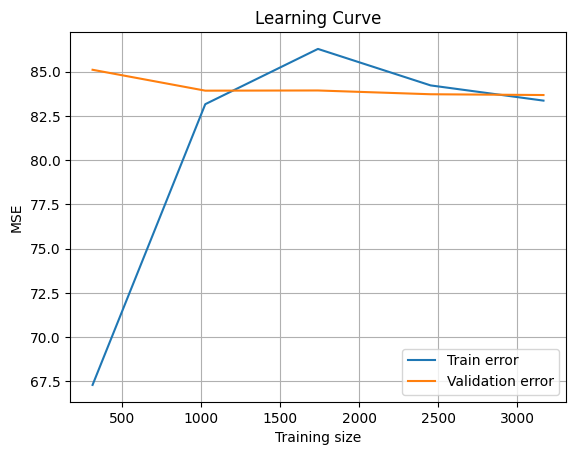

In [72]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator, X, y, cv=5, scoring="neg_mean_squared_error"
)

train_mean = -np.mean(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train error")
plt.plot(train_sizes, val_mean, label="Validation error")
plt.xlabel("Training size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()


In [67]:
# degree = 3 olanda
# ==== Scores ====
# Train Score : 0.9969705755703931
# Test Score : 0.9967315215630759




# # Eger Polynomial istifade etmeseeydik
# ==== Scores ====
# Train Score : 0.50312345
# Test Score : 0.503123453